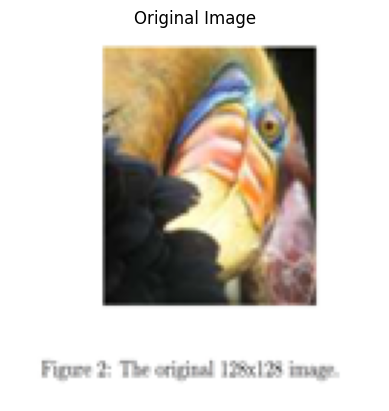

(128, 128, 3)


In [14]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = Image.open('/kaggle/input/kmeansbird/figure 2.png')  # update path if needed
image = image.resize((128, 128))  # make sure it's 128x128

# Convert image to numpy array
image_np = np.array(image)

# If image has alpha channel (4 channels), remove alpha and keep RGB only
if image_np.shape[2] == 4:
    image_np = image_np[:, :, :3]  # keep only RGB channels

# Define height, width, channels
h, w, c = image_np.shape

# Show the image
plt.imshow(image_np)
plt.axis('off')
plt.title("Original Image")
plt.show()

print(image_np.shape)


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Colors shape: (32, 3)
Labels shape: (16384,)


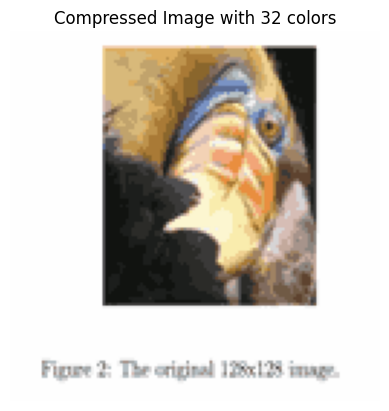

In [15]:
from sklearn.cluster import KMeans

# Reshape pixels correctly with c channels
pixels = image_np.reshape(-1, c)

k = 32

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixels)

# Get the cluster centers (colors)
colors = kmeans.cluster_centers_.astype('uint8')
print(f"Colors shape: {colors.shape}")  # (k, 3)

# Get the labels for each pixel
labels = kmeans.labels_
print(f"Labels shape: {labels.shape}")  # (h*w,)

# Map each pixel to its cluster color
compressed_pixels = colors[labels]

# Reshape back to original image shape
compressed_image = compressed_pixels.reshape(h, w, c)

# Display compressed image
plt.imshow(compressed_image)
plt.title(f'Compressed Image with {k} colors')
plt.axis('off')
plt.show()
